In [187]:
# Plotting setup
import matplotlib.pyplot as plt

# Package imports
import numpy as np
import pandas as pd
import geopandas
import math
import datetime
import mpl_toolkits
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

First we import the data

In [3]:
# Link to current data of the RKI
url = "https://www.kaggle.com/mohitkr05/global-significant-earthquake-database-from-2150bc"

# Read CSV data from URL
earthquakes = pd.read_csv('EarthquakeData.csv')

Now we do a bit of cleaning by filtering out earthquakes that do not have a valid location

In [4]:
#we find rows that actually have a value
#for LONGITUDE
goodValues = []

for i in range(len(earthquakes["LONGITUDE"])):
    #print(i)
    if i != 305 and earthquakes["LATITUDE"][i] != '       ':
        if not math.isnan(float(earthquakes["LONGITUDE"][i])):
            goodValues += [i]

#select rows that have a real
#longitude coordinate
earthquakes = earthquakes.iloc[goodValues].reset_index()


earthquakes["LONGITUDE"] = earthquakes["LONGITUDE"].astype(float)
earthquakes["LATITUDE"] = earthquakes["LATITUDE"].astype(float)

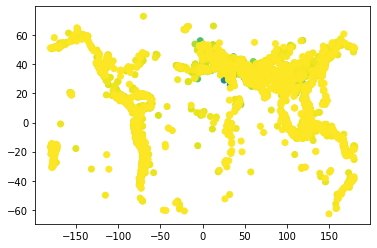

In [5]:
plt.scatter(earthquakes["LONGITUDE"], earthquakes["LATITUDE"], c=earthquakes["YEAR"])

The amount of earthquakes per unit time has risen substantially. This is due to our improved ability to detect earthquakes. Now we want to find a cutoff date where the number of detected earthquakes stays somewhat constant. This means we can reduce selection bias.

In [6]:
freq = earthquakes.assign(century=(earthquakes["YEAR"]//100)*100)
freq = freq.assign(decade=(earthquakes["YEAR"]//10)*10)
freq_by_century = freq[["century"]]
freq_by_decade = freq[["decade"]]

In [7]:
freq_by_century

,century
0,-2200
1,-2000
2,-2000
3,-1700
4,-1600
...,...
6133,2000
6134,2000
6135,2000
6136,2000


<AxesSubplot:xlabel='decade'>

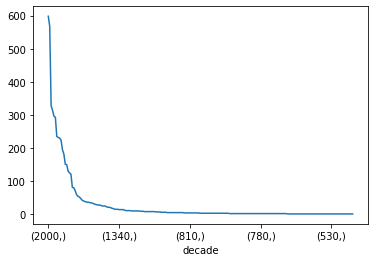

In [8]:
freq_by_decade.value_counts().plot()

(array([1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 7.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.100e+01, 4.000e+00, 1.300e+01, 7.000e+00,
        9.000e+00, 6.000e+00, 0.000e+00, 5.000e+00, 4.000e+00, 1.400e+01,
        1.100e+01, 7.000e+00, 1.000e+01, 8.000e+00, 1.900e+01, 6.000e+00,
        2.000e+00, 5.000e+00, 6.000e+00, 1.500e+01, 1.000e+01, 1.700e+01,
        2.900e+01, 6.000e+00, 1.300e+01, 1.700e+01, 1.700e+01, 2.600e+01,
        2.000e+01, 2.400e+01, 1.400e+0

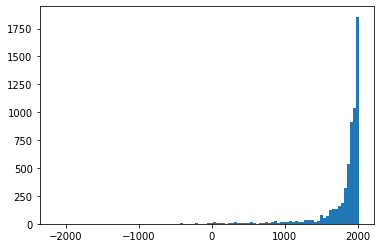

In [9]:
plt.hist(earthquakes["YEAR"], bins = 100)

The year 2000 appears to be a good cutoff date. This means we are investigating the most recent 21 years of data

(array([ 62., 132., 138., 128., 138., 122., 101., 103., 116., 140.]),
 array([2000., 2002., 2004., 2006., 2008., 2010., 2012., 2014., 2016.,
        2018., 2020.]),
 <BarContainer object of 10 artists>)

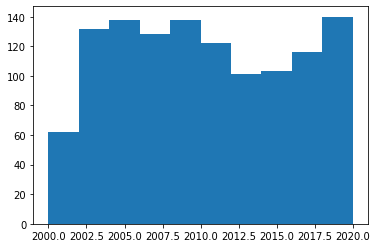

In [10]:
new_quakes = earthquakes.query("YEAR >= 2000")
plt.hist(new_quakes["YEAR"], bins = 10)

Now we divide into regions. We will then eliminate regions with a small earthquake count since the lack of data for that region will do us no good. 

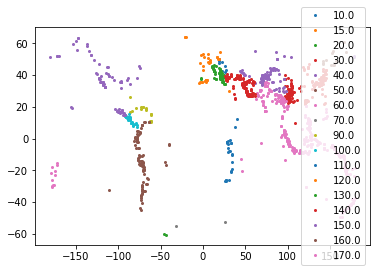

In [11]:
groups = new_quakes.groupby('REGION_CODE')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.LONGITUDE, group.LATITUDE, marker='o', linestyle='', ms=2, label=name)
ax.legend(loc = "right")

plt.show()

In [12]:
by_region = new_quakes.groupby("REGION_CODE").mean()[["EQ_PRIMARY", "LATITUDE", "LONGITUDE"]]
by_region["COUNT"] = new_quakes.groupby("REGION_CODE").size()
by_region["RATE"] = by_region["COUNT"]/21

In [13]:
by_region

,EQ_PRIMARY,LATITUDE,LONGITUDE,COUNT,RATE
REGION_CODE,,,,,
10.0,5.255556,-9.739407,31.296481,27,1.285714
15.0,5.217647,36.028353,3.978824,17,0.809524
20.0,7.650000,-60.403000,-44.906000,2,0.095238
30.0,5.855556,31.337164,118.903275,189,9.000000
40.0,5.801042,39.134729,75.360719,96,4.571429
50.0,7.338462,50.159846,152.669692,13,0.619048
60.0,5.855676,11.125640,91.946511,186,8.857143
70.0,6.200000,-53.909000,-2.730000,2,0.095238
90.0,6.383333,16.821167,-69.738000,18,0.857143


For now, I am deciding that the cutoff shall be that we need at least 20 earthquakes in a region if we are going to consider that region in our upcoming analyses. I may change that cutoff later. 

In [14]:
by_region = by_region.query("COUNT > 20").reset_index()
by_region

,REGION_CODE,EQ_PRIMARY,LATITUDE,LONGITUDE,COUNT,RATE
0,10.0,5.255556,-9.739407,31.296481,27,1.285714
1,30.0,5.855556,31.337164,118.903275,189,9.000000
2,40.0,5.801042,39.134729,75.360719,96,4.571429
3,60.0,5.855676,11.125640,91.946511,186,8.857143
4,100.0,6.051220,11.714488,-86.407561,41,1.952381
5,120.0,4.559091,51.827545,4.262227,22,1.047619
6,130.0,5.560345,40.450966,17.985241,58,2.761905
7,140.0,5.488000,34.138960,46.121563,126,6.000000
8,150.0,5.962500,35.953350,-107.689550,80,3.809524
9,160.0,6.236735,-14.621010,-72.227515,99,4.714286


Now we want to filter out the invalid regions in new_quakes

In [15]:
list_of_regions = by_region["REGION_CODE"].tolist()
new_quakes = new_quakes.assign(VALID_REGION = new_quakes["REGION_CODE"].isin(list_of_regions))
new_quakes = new_quakes.query("VALID_REGION == True").reset_index()


In [202]:
region_names = []
for i in range(len(new_quakes["REGION_CODE"])):
    if new_quakes["REGION_CODE"][i] == 10:
        region_names += ["Central, Western and S. Africa"]
    if new_quakes["REGION_CODE"][i] == 15:
        region_names += ["Northern Africa"]
    if new_quakes["REGION_CODE"][i] == 20:
        region_names += ["Antarctica"]
    if new_quakes["REGION_CODE"][i] == 30:
        region_names += ["East Asia"]
    if new_quakes["REGION_CODE"][i] == 40:
        region_names += ["Central Asia and Caucasus"]
    if new_quakes["REGION_CODE"][i] == 50:
        region_names += ["Kamchatka and Kuril Islands"]
    if new_quakes["REGION_CODE"][i] == 60:
        region_names += ["S. and SE. Asia and Indian Ocean"]
    if new_quakes["REGION_CODE"][i] == 70:
        region_names += ["Atlantic Ocean"]
    if new_quakes["REGION_CODE"][i] == 80:
        region_names += ["Bering Sea"]
    if new_quakes["REGION_CODE"][i] == 90:
        region_names += ["Carribean"]
    if new_quakes["REGION_CODE"][i] == 100:
        region_names += ["Central America"]
    if new_quakes["REGION_CODE"][i] == 110:
        region_names += ["Eastern Europe"]
    if new_quakes["REGION_CODE"][i] == 120:
        region_names += ["Northern and Western Europe"]
    if new_quakes["REGION_CODE"][i] == 130:
        region_names += ["Southern Europe"]
    if new_quakes["REGION_CODE"][i] == 140:
        region_names += ["Middle East"]
    if new_quakes["REGION_CODE"][i] == 150:
        region_names += ["North America and Hawaii"]
    if new_quakes["REGION_CODE"][i] == 160:
        region_names += ["South America"]
    if new_quakes["REGION_CODE"][i] == 170:
        region_names += ["Central and South Pacific"]
        
new_quakes["REGION_NAME"] = region_names
new_quakes
        
        

,level_0,index,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,...,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION,VALID_REGION,DATE,WAITING_TIME,REGION_NAME
0,4958,5013,5551,No,2000,1.0,3.0,22.0,34.0,12.6,...,NaN,1.0,NaN,NaN,100.0,2.0,True,2000-01-03,0,S. and SE. Asia and Indian Ocean
1,4959,5014,5552,No,2000,1.0,11.0,23.0,43.0,56.4,...,NaN,3.0,3600.0,4.0,8800.0,4.0,True,2000-01-11,8,East Asia
2,4960,5015,5553,No,2000,1.0,14.0,23.0,37.0,7.8,...,73.50,4.0,41000.0,4.0,NaN,NaN,True,2000-01-14,3,East Asia
3,4961,5016,5554,No,2000,2.0,2.0,22.0,58.0,1.5,...,NaN,2.0,100.0,2.0,300.0,3.0,True,2000-02-02,19,Middle East
4,4962,5017,5555,No,2000,2.0,7.0,19.0,34.0,57,...,NaN,1.0,NaN,NaN,NaN,NaN,True,2000-02-07,5,"Central, Western and S. Africa"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,6133,6188,10488,No,2020,4.0,1.0,12.0,23.0,27,...,11.28,3.0,NaN,NaN,790.0,3.0,True,2020-04-01,10,East Asia
1115,6134,6189,10490,Yes,2020,5.0,2.0,12.0,51.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,True,2020-05-02,31,Southern Europe
1116,6135,6190,10491,No,2020,5.0,7.0,20.0,18.0,22,...,NaN,NaN,NaN,NaN,NaN,NaN,True,2020-05-07,5,Middle East
1117,6136,6191,10494,No,2020,5.0,18.0,13.0,48.0,3,...,NaN,2.0,NaN,1.0,NaN,NaN,True,2020-05-18,11,East Asia


True

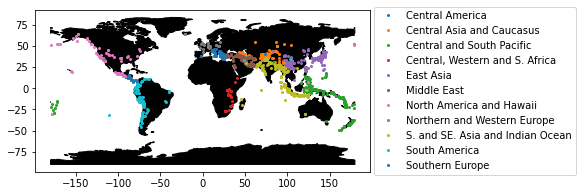

In [208]:
groups = new_quakes.groupby('REGION_NAME')
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.LONGITUDE, group.LATITUDE, marker='o', linestyle='', ms=2, label=name)
ax.legend(loc = "right", bbox_to_anchor = (1.63, 0.5))

world.plot(ax=ax, color='black', edgecolor='black')

plt.savefig('new_quakes_world_map.pdf', bbox_inches='tight')  
plt.show()

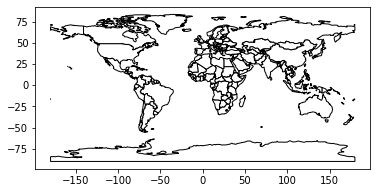

In [229]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
world.plot(ax=ax, color='white', edgecolor='black')
ax.plot(ax=ax, marker='o', color='red', markersize=5)
plt.show()

<AxesSubplot:>

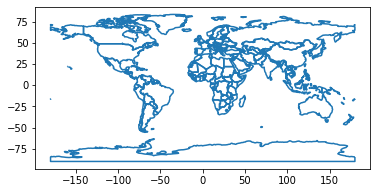

In [230]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


#for name, group in groups:
#    world.plot(group.LONGITUDE, group.LATITUDE, marker='o', linestyle='', ms=2, label=name)
#world.legend(loc = "right", bbox_to_anchor = (1.22, 0.5))
#world.drawcountries()
world.boundary.plot()

Do these earthquakes follow a Poisson process? We need to calculate waiting times for each quake. 

In [231]:
new_quakes["DATE"] = new_quakes["YEAR"].apply(str)+"-"+new_quakes["MONTH"].apply(int).apply(str)+"-"+new_quakes["DAY"].apply(int).apply(str)
new_quakes["DATE"] = pd.to_datetime(new_quakes["DATE"])

new_quakes = new_quakes.sort_values("DATE")


In [232]:
waiting_times = [new_quakes["DATE"][0] - new_quakes["DATE"][0]]

for i in range(len(new_quakes['YEAR']) - 1):
    waiting_times += [new_quakes["DATE"][i+1] - new_quakes["DATE"][i]]
    
new_quakes = new_quakes.assign(WAITING_TIME = waiting_times)
new_quakes["WAITING_TIME"] = new_quakes["WAITING_TIME"].dt.days

In [233]:
new_quakes

,level_0,index,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,...,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION,VALID_REGION,DATE,WAITING_TIME,REGION_NAME
0,4958,5013,5551,No,2000,1.0,3.0,22.0,34.0,12.6,...,NaN,1.0,NaN,NaN,100.0,2.0,True,2000-01-03,0,S. and SE. Asia and Indian Ocean
1,4959,5014,5552,No,2000,1.0,11.0,23.0,43.0,56.4,...,NaN,3.0,3600.0,4.0,8800.0,4.0,True,2000-01-11,8,East Asia
2,4960,5015,5553,No,2000,1.0,14.0,23.0,37.0,7.8,...,73.50,4.0,41000.0,4.0,NaN,NaN,True,2000-01-14,3,East Asia
3,4961,5016,5554,No,2000,2.0,2.0,22.0,58.0,1.5,...,NaN,2.0,100.0,2.0,300.0,3.0,True,2000-02-02,19,Middle East
4,4962,5017,5555,No,2000,2.0,7.0,19.0,34.0,57,...,NaN,1.0,NaN,NaN,NaN,NaN,True,2000-02-07,5,"Central, Western and S. Africa"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,6133,6188,10488,No,2020,4.0,1.0,12.0,23.0,27,...,11.28,3.0,NaN,NaN,790.0,3.0,True,2020-04-01,10,East Asia
1115,6134,6189,10490,Yes,2020,5.0,2.0,12.0,51.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,True,2020-05-02,31,Southern Europe
1116,6135,6190,10491,No,2020,5.0,7.0,20.0,18.0,22,...,NaN,NaN,NaN,NaN,NaN,NaN,True,2020-05-07,5,Middle East
1117,6136,6191,10494,No,2020,5.0,18.0,13.0,48.0,3,...,NaN,2.0,NaN,1.0,NaN,NaN,True,2020-05-18,11,East Asia


(array([245., 124., 101.,  94.,  90.,  61.,  64.,  47.,  37.,  25.,  29.,
         25.,  28.,  28.,  13.,  27.,   8.,   7.,   8.,   4.,   6.,   4.,
          7.,   2.,   4.,   3.,   1.,   3.,   3.,   4.,   4.,   4.,   1.,
          0.,   0.,   2.,   2.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.]),
 array([ 0.        ,  1.06666667,  2.13333333,  3.2       ,  4.26666667,
         5.33333333,  6.4       ,  7.46666667,  8.53333333,  9.6       ,
        10.66666667, 11.73333333, 12.8       , 13.86666667, 14.93333333,
        16.        , 17.06666667, 18.13333333, 19.2       , 20.26666667,
        21.33333333, 22.4       , 23.46666667, 24.53333333, 25.6       ,
        26.66666667, 27.73333333, 28.8       , 29.86666667, 30.93333333,
        32.        , 33.06666667, 34.13333333, 35.2       , 36.26666667,
        37.33333333, 38.4       , 39.46666667, 40.53333333, 41.6       ,
      

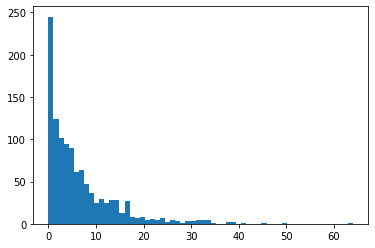

In [234]:
plt.hist(new_quakes["WAITING_TIME"], bins = 60)

Wow that sure looks like we are dealing with an exponential waiting time!

In [235]:
new_quakes["WAITING_TIME"].mean()

6.659517426273458

Cool, let's see if waiting time and earthquake size are correlated

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  3.,   0.,  17.,  77., 237., 281., 274., 146.,  74.,   7.]),
 array([1.6 , 2.35, 3.1 , 3.85, 4.6 , 5.35, 6.1 , 6.85, 7.6 , 8.35, 9.1 ]),
 <BarContainer object of 10 artists>)

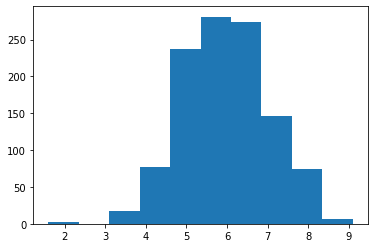

In [236]:
plt.hist(new_quakes["EQ_PRIMARY"])

In [237]:
large_quakes = new_quakes.query("EQ_PRIMARY > 8")
large_quakes["WAITING_TIME"].mean()

8.75

In [238]:
small_quakes = new_quakes.query("EQ_PRIMARY < 4.5")
small_quakes["WAITING_TIME"].mean()

5.436619718309859

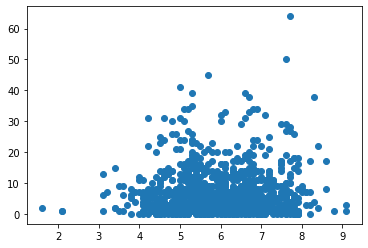

In [239]:
plt.scatter(new_quakes["EQ_PRIMARY"], new_quakes["WAITING_TIME"])

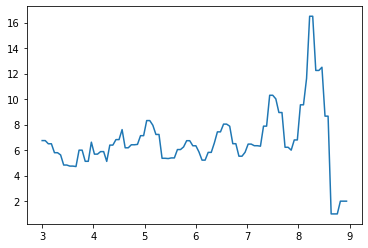

In [240]:
window_size = 0.3

mean_wait = []
magnitude = []

for i in range(100):
    j = 3 + i*6/100
    
    magnitude += [j]
    query = "EQ_PRIMARY >= "+str(j)+"and EQ_PRIMARY <"+str(j+window_size)
    mean_wait += [new_quakes.query(query)["WAITING_TIME"].mean()]
    
plt.plot(magnitude, mean_wait)

Awesome! It looks like bigger earthquakes, on average, have a larger waiting time than other earthquakes. Now let's look at the size and location of earthquakes that precede large earthquakes

In [241]:
for i in range(len(new_quakes["YEAR"])):
    if new_quakes["EQ_PRIMARY"][i] > 8:
        print(i, "magnitude", new_quakes["EQ_PRIMARY"][i], "region", new_quakes["REGION_CODE"][i], "prec_mag", new_quakes["EQ_PRIMARY"][i-1], "prec_reg", new_quakes["REGION_CODE"][i-1])

46 magnitude 8.4 region 160.0 prec_mag 5.0 prec_reg 40.0
164 magnitude 8.3 region 30.0 prec_mag 6.6 prec_reg 60.0
253 magnitude 8.1 region 170.0 prec_mag 5.4 prec_reg 140.0
254 magnitude 9.1 region 60.0 prec_mag 8.1 prec_reg 170.0
275 magnitude 8.6 region 60.0 prec_mag 6.6 prec_reg 30.0
379 magnitude 8.1 region 170.0 prec_mag 5.8 prec_reg 130.0
409 magnitude 8.4 region 60.0 prec_mag 6.8 prec_reg 160.0
541 magnitude 8.1 region 170.0 prec_mag 3.1 prec_reg 170.0
573 magnitude 8.8 region 160.0 prec_mag 7.0 prec_reg 30.0
631 magnitude 9.1 region 30.0 prec_mag 5.5 prec_reg 30.0
692 magnitude 8.6 region 60.0 prec_mag 7.2 prec_reg 160.0
693 magnitude 8.2 region 60.0 prec_mag 8.6 prec_reg 60.0
787 magnitude 8.2 region 160.0 prec_mag 5.1 prec_reg 150.0
857 magnitude 8.3 region 160.0 prec_mag 4.5 prec_reg 100.0
966 magnitude 8.2 region 150.0 prec_mag 5.0 prec_reg 170.0
1025 magnitude 8.2 region 170.0 prec_mag 5.0 prec_reg 30.0


That did not appear to be very useful at all. Now let's try and see if waiting times change after an earthquake in another region

In [242]:
list_of_datasets = []

for region in list_of_regions:
    query = "REGION_CODE == "+str(region)
    list_of_datasets += [new_quakes.query(query).reset_index(drop=True)]
    


In [243]:
def find_next_quake(starting_date, df):
    #starting date is a datetime
    #df is a pandas data frame with a DATE column of dates
    #and it must be sorted with oldest dates being first!
    for i in range(len(df["DATE"])):
        if starting_date <= df["DATE"][i]:
            wait_time = df["DATE"][i] - starting_date
            #print(wait_time, "bb", wait_time.days)
            return wait_time.days
        
    return None
            
    

In [244]:
rate_matrix = np.zeros((len(list_of_datasets), len(list_of_datasets)))

for i in range(len(list_of_datasets)):
    for j in range(len(list_of_datasets)):
        current_region = list_of_datasets[i]
        waiting_times = []


        for k in range(len(current_region["DATE"])):
            #print(i, j, k, current_region["DATE"])
            starting_date = current_region["DATE"][k]
            region = list_of_datasets[j]
            next_quake = find_next_quake(starting_date, region)
            if next_quake is not None:
                
                waiting_times += [next_quake]
            
        mean_wait_time = sum(waiting_times)/len(waiting_times)
        
        rate_matrix[i][j] = mean_wait_time
        
rate_matrix

array([[  0.        ,  38.66666667,  84.59259259,  45.44444444,
        188.62962963, 416.55555556, 112.37037037,  55.96296296,
         96.92592593,  88.85185185,  56.18518519],
       [310.84357542,   0.        ,  79.10695187,  48.17989418,
        174.37016575, 568.54644809, 130.55319149, 100.40957447,
        110.21390374,  98.43243243,  44.20430108],
       [324.31578947,  51.91666667,   0.        ,  43.55208333,
        166.55789474, 583.68421053, 141.28125   ,  83.27083333,
        112.5625    ,  80.74736842,  31.58947368],
       [251.87777778,  45.24864865,  89.63043478,   0.        ,
        205.40331492, 572.91712707, 132.80540541,  69.55675676,
        107.4972973 ,  84.32065217,  38.67391304],
       [282.4       ,  50.87804878,  74.43902439,  50.68292683,
          0.        , 479.12195122, 124.02439024,  98.75609756,
        105.56097561,  92.3902439 ,  48.04878049],
       [230.76190476,  35.36363636,  73.5       ,  34.36363636,
        143.76190476,   0.        , 126.0

Now I want to subtract the normal waiting time for each region and investigate the differences

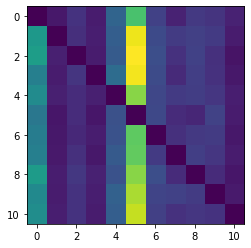

In [245]:
plt.imshow(rate_matrix, interpolation='nearest')

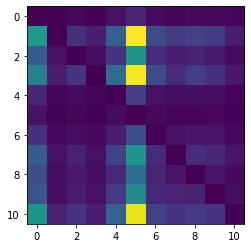

In [246]:
for i in range(len(list_of_datasets)):
    mean_wait_time = (21*365.25)/len(list_of_datasets[i]["DATE"]) 
    
    #what do larger or smller values mean? 
    #values far from 1 mean an earthquake in 
    #region i gives us info about the next earthquake 
    #in region j
    rate_matrix[i] = rate_matrix[i]/mean_wait_time
    
    
    
    
    
plt.imshow(rate_matrix, interpolation='nearest')

In [247]:
rate_matrix

array([[ 0.        ,  0.1361103 ,  0.29777387,  0.15996871,  0.663994  ,
         1.46631466,  0.39555425,  0.19699488,  0.34118836,  0.31276686,
         0.19777713],
       [ 7.65938995,  0.        ,  1.94924727,  1.18718425,  4.29659546,
        14.00935806,  3.21691642,  2.47415789,  2.71574301,  2.42543981,
         1.08922302],
       [ 4.05910052,  0.64978325,  0.        ,  0.54509305,  2.08462017,
         7.30532697,  1.76826049,  1.04220853,  1.40881979,  1.01062513,
         0.39537036],
       [ 6.10791912,  1.09725871,  2.17349641,  0.        ,  4.98093499,
        13.89297424,  3.2204694 ,  1.68671905,  2.60675953,  2.04473665,
         0.93782443],
       [ 1.50952055,  0.27195984,  0.39790098,  0.27091685,  0.        ,
         2.56106385,  0.66295101,  0.52788371,  0.56425801,  0.49385613,
         0.25683648],
       [ 0.66187698,  0.10143085,  0.21081451,  0.09856263,  0.41234144,
         0.        ,  0.36152668,  0.20299208,  0.17913367,  0.32789023,
         0.127

We need to go back and see if each region follows a poisson process. To do this we will see if the waiting times are independent of eachother and we will also see if the waiting times follow an exponential distribution. 

In [248]:
for i in range(len(list_of_datasets)):
    #for each region, we want a pandas column of waiting times
    #the waiting times indicate how long we waited for that row's quake
    waiting_times = [list_of_datasets[i]["DATE"][0] - list_of_datasets[i]["DATE"][0]]
    
    for j in range(len(list_of_datasets[i]['YEAR']) - 1):
        waiting_times += [list_of_datasets[i]["DATE"][j+1] - list_of_datasets[i]["DATE"][j]]
        
    list_of_datasets[i] = list_of_datasets[i].assign(WAITING_TIME = waiting_times)
    list_of_datasets[i]["WAITING_TIME"] = list_of_datasets[i]["WAITING_TIME"].dt.days
    

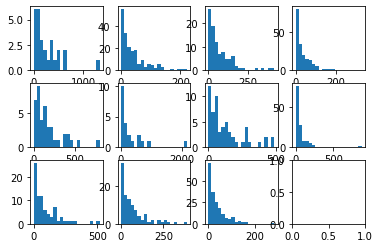

In [249]:
#plt.hist(new_quakes["WAITING_TIME"], bins = 60)

fig, axs = plt.subplots(3,4)

for i in range(len(list_of_datasets)):
    axs[i//4, i%4].hist(list_of_datasets[i]["WAITING_TIME"], bins = 20)

These all look pretty exponential to me. I'm guessing I need to do likelihood ratio test to say so with more authority. For now, I want to plot the n-th waiting time vs. the n+1th waiting time and see what we get. 

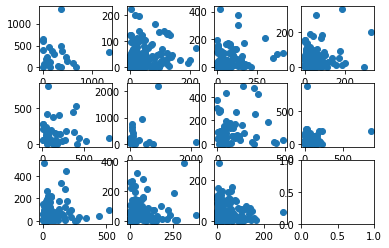

In [250]:
fig, axs = plt.subplots(3,4)

for i in range(len(list_of_datasets)):
    axs[i//4, i%4].scatter(list_of_datasets[i]["WAITING_TIME"][range(2, len(list_of_datasets[i]["WAITING_TIME"]))],
                           list_of_datasets[i]["WAITING_TIME"][range(1, len(list_of_datasets[i]["WAITING_TIME"])-1)])

There appears to be very little correlation in any of these plots, which suggests independence. Now I want to compare these plots to what they would look like if we had data that was truly generated by a poisson process, and data that came from something else like gamma distributions or mixture distributions (observations from a mixture would not be independent). To do this we need to be able to generate data from these distributions. 

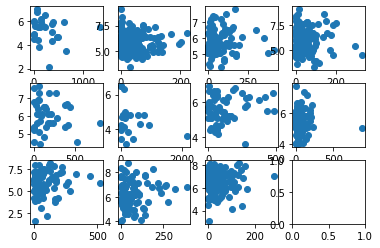

In [251]:
fig, axs = plt.subplots(3,4)

for i in range(len(list_of_datasets)):
    axs[i//4, i%4].scatter(list_of_datasets[i]["WAITING_TIME"],
                           list_of_datasets[i]["EQ_PRIMARY"])

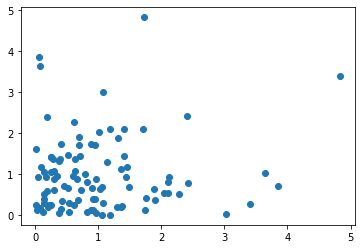

In [252]:
a = np.random.exponential(1, 100)
plt.scatter(a[range(1, 99)], a[range(0, 98)])

In [253]:
np.random.binomial(1, 0.5, 5)

array([1, 1, 0, 0, 0])

Now we wish to see if a hidden markov chain would cause consecutive observations to become less independent

ok so plotting consecutive observations against each other turned out to be a bust. I proceed with trying to do a qq plot for each region to see if they look exponential. 


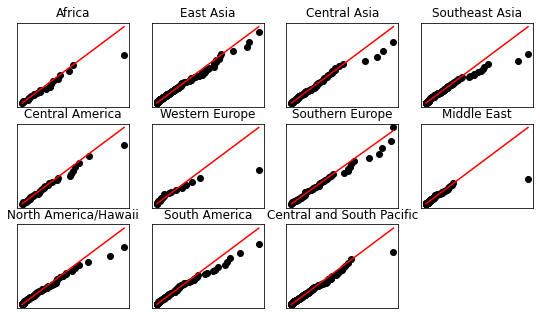

In [257]:
fig, axsQQ = plt.subplots(3,4)

def getQuantileExp(p, rate):
    return -1*math.log(1-p)/rate

for i in range(len(list_of_datasets)):
    
    rate = 1 / list_of_datasets[i]["WAITING_TIME"].mean()
    n = list_of_datasets[i]["WAITING_TIME"].count()-1 #subtract 1 since first obs is zero
    
    list_of_datasets[i] = list_of_datasets[i].sort_values("WAITING_TIME")
    
    Q_theory = [0]
    Q_exp = [0]
    
    for j in range(n):
        Q_exp += [list_of_datasets[i]["WAITING_TIME"][j+1]]
        #print((j+1)/n, rate)
        Q_theory += [getQuantileExp((j)/n, rate)]
        
    list_of_datasets[i]["Q_THEORY"] = Q_theory
    list_of_datasets[i]["Q_EXP"] = Q_exp
    
    
    axsQQ[i//4, i%4].scatter(list_of_datasets[i]["WAITING_TIME"],
                           list_of_datasets[i]["Q_THEORY"], color = "black")
    axsQQ[i//4, i%4].plot(list_of_datasets[i]["WAITING_TIME"],
                         list_of_datasets[i]["WAITING_TIME"], color = "red")
    
    axsQQ[i//4, i%4].axes.get_xaxis().set_visible(False)
    axsQQ[i//4, i%4].axes.get_yaxis().set_visible(False)
    
    axsQQ[i//4, i%4].set_title(list_of_datasets[i]["REGION_NAME"][0])
    
    if i == 0:
        axsQQ[i//4, i%4].set_title("Africa")
    if i == 3:
        axsQQ[i//4, i%4].set_title("Southeast Asia")
    if i == 5:
        axsQQ[i//4, i%4].set_title("Western Europe")
    if i == 2:
        axsQQ[i//4, i%4].set_title("Central Asia")
    if i == 8:
        axsQQ[i//4, i%4].set_title("North America/Hawaii")


fig.set_size_inches(18.5/2, 10.5/2)
fig.delaxes(axsQQ[2][3])
plt.savefig('exp_QQ_plots.pdf', bbox_inches='tight')

In [228]:
list_of_datasets[0]#["REGION_NAMES"][0]


,level_0,index,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,...,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION,VALID_REGION,DATE,WAITING_TIME,Q_THEORY,Q_EXP,WAIT_TIME_SMOOTH,WAIT_TIME_SMOOTH_INVERSE
0,4962,5017,5555,No,2000,2.0,7.0,19.0,34.0,57,...,NaN,NaN,NaN,True,2000-02-07,0,0.000000,0,NaN,NaN
14,5549,5604,8793,No,2009,12.0,8.0,3.0,8.0,57.2,...,NaN,3000.0,4.0,True,2009-12-08,2,-0.000000,238,277.0,0.003610
15,5553,5608,8632,No,2009,12.0,19.0,23.0,19.0,15.5,...,4.0,3565.0,4.0,True,2009-12-19,11,10.142186,472,259.0,0.003861
12,5428,5483,7768,No,2008,2.0,14.0,2.0,7.0,46.7,...,NaN,5.0,1.0,True,2008-02-14,11,20.698451,121,174.6,0.005727
20,5912,5967,10228,No,2016,9.0,23.0,16.0,12.0,1,...,1.0,NaN,NaN,True,2016-09-23,13,31.704052,159,494.0,0.002024
23,5966,6021,10257,No,2017,6.0,24.0,2.0,37.0,48,...,1.0,2.0,1.0,True,2017-06-24,30,43.198949,488,137.4,0.007278
8,5286,5341,6830,No,2005,12.0,5.0,12.0,19.0,56.6,...,3.0,NaN,NaN,True,2005-12-05,72,55.228680,379,259.4,0.003855
9,5294,5349,7225,No,2006,2.0,22.0,22.0,19.0,7.8,...,3.0,NaN,NaN,True,2006-02-22,79,67.845455,199,243.4,0.004108
26,6077,6132,10400,No,2019,3.0,21.0,9.0,15.0,40,...,1.0,NaN,1.0,True,2019-03-21,89,81.109521,72,151.0,0.006623
22,5959,6014,10255,No,2017,5.0,25.0,9.0,55.0,51,...,NaN,NaN,NaN,True,2017-05-25,90,95.090904,79,204.8,0.004883


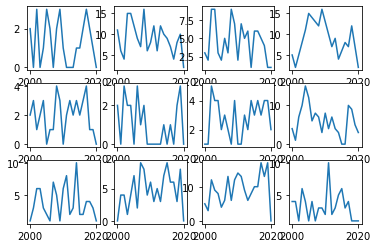

In [258]:
regions = []
for i in range(len(list_of_datasets)):
    regions += [list_of_datasets[i]["REGION_CODE"][0]]
    
quakes_per_year = pd.DataFrame()
quakes_per_year["YEAR"] = range(2000, 2021)

for i in range(len(list_of_datasets)):
     
    count = []
    
    for j in range(2000, 2021):
        count += [list_of_datasets[i].query("YEAR == "+str(j)).shape[0]]
        
    quakes_per_year[str(list_of_datasets[i]["REGION_CODE"][0])] = count
    
fig, axs = plt.subplots(3,4)


for i in range(len(list_of_datasets)):
    axs[i//4, i%4].plot(quakes_per_year["YEAR"],
                          quakes_per_year.iloc[:, i+1])
axs[11//4, 11%4].plot(quakes_per_year["YEAR"],
                          np.random.poisson(3, 21))

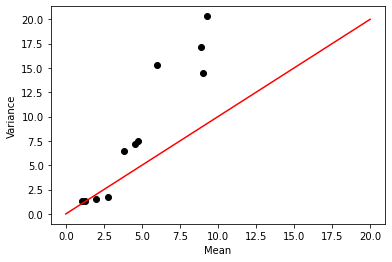

In [261]:
mean_quakes_per_year = []
var_quakes_per_year = []
fig, ax = plt.subplots(1,1)

for i in range(len(list_of_datasets)):
    mean_quakes_per_year += [quakes_per_year.iloc[:,i+1].mean()]
    var_quakes_per_year += [quakes_per_year.iloc[:,i+1].var()]
    
ax.scatter(mean_quakes_per_year, var_quakes_per_year, color = "black")
ax.plot([0,20],[0,20], color = "red")
ax.set_ylabel('Variance')
ax.set_xlabel('Mean')

plt.savefig('mean_v_var.pdf', bbox_inches='tight')

The high variance compared to mean implies that we do not have a poisson process, and that the earthquakes are too clustered to follow a poisson process. This probably means we are better off using a hidden markov model which is going to get super nasty very quickly. We now plot the date of each earthquake

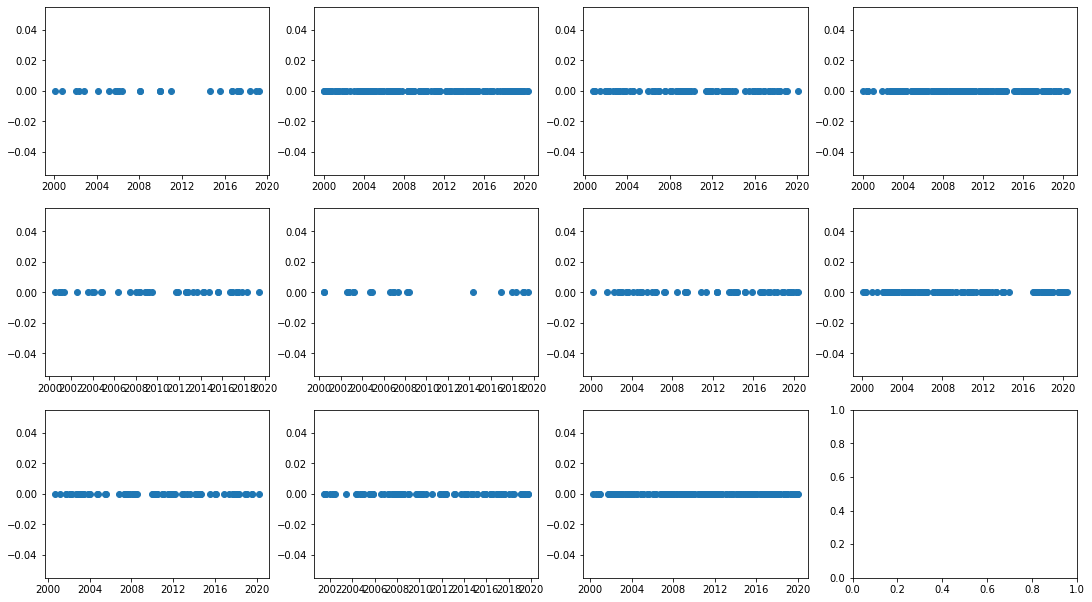

In [43]:
fig, axs = plt.subplots(3,4)

for i in range(len(list_of_datasets)):
    axs[i//4, i%4].scatter(list_of_datasets[i]["DATE"],
                          np.zeros(len(list_of_datasets[i]["DATE"])))
    
fig.set_size_inches(18.5, 10.5)

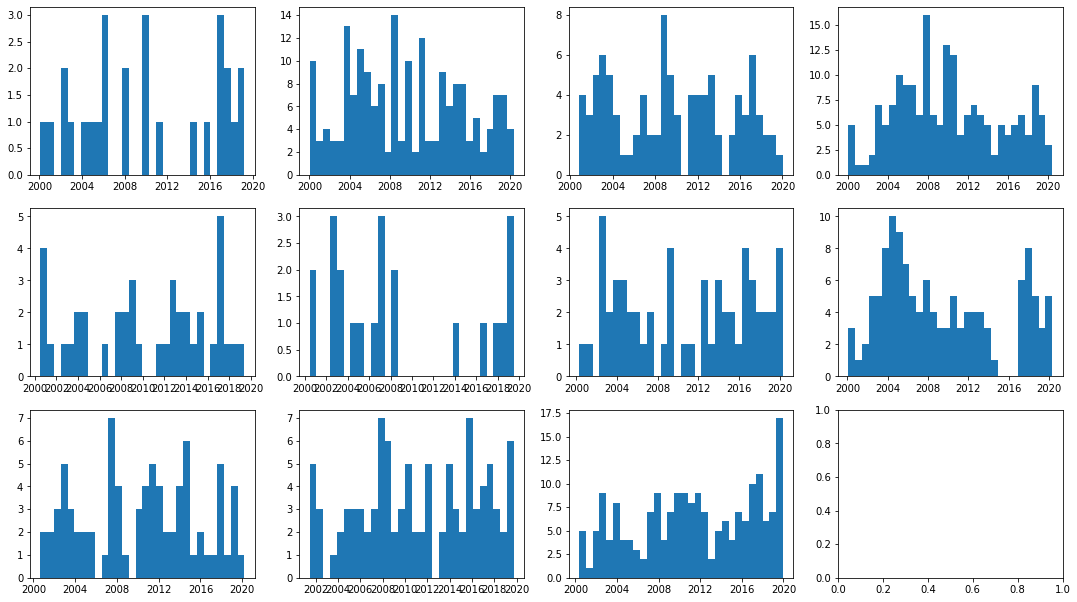

In [44]:
fig, axs = plt.subplots(3,4)

for i in range(len(list_of_datasets)):
    axs[i//4, i%4].hist(list_of_datasets[i]["DATE"], bins = 30)
    
fig.set_size_inches(18.5, 10.5)

In [45]:
#pd.to_datetime(new_quakes["DATE"])

list_of_datasets[0].sort_values("DATE")["WAITING_TIME"].rolling(3).mean()

0            NaN
1            NaN
2     236.666667
3     277.000000
4     250.666667
5     256.000000
6     342.000000
7     355.333333
8     216.666667
9     116.666667
10     84.000000
11    263.333333
12    240.666667
13    427.333333
14    224.666667
15    224.666667
16    125.000000
17    567.000000
18    685.666667
19    698.333333
20    260.000000
21    189.000000
22     85.666667
23     91.333333
24    144.333333
25    192.000000
26    211.666667
Name: WAITING_TIME, dtype: float64

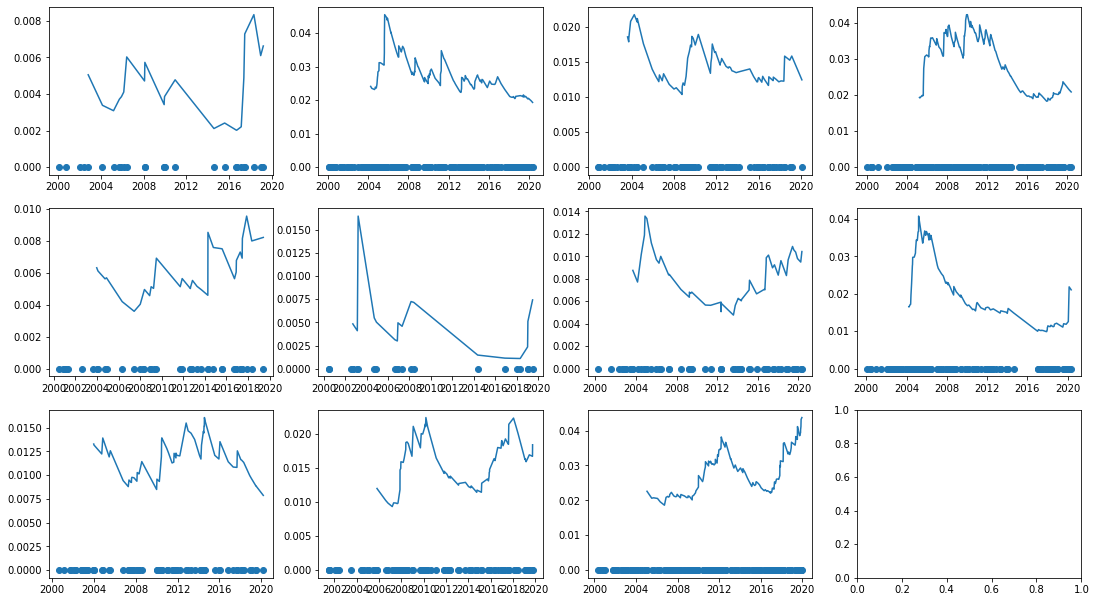

In [46]:
fig, axs = plt.subplots(3,4)

for i in range(len(list_of_datasets)):
    
    list_of_datasets[i] = list_of_datasets[i].sort_values("DATE")
    
    window = int(len(list_of_datasets[i]["DATE"]) / 5)
    
    list_of_datasets[i]["WAIT_TIME_SMOOTH"] = list_of_datasets[i]["WAITING_TIME"].rolling(window).mean()
    
    list_of_datasets[i]["WAIT_TIME_SMOOTH_INVERSE"] = list_of_datasets[i]["WAIT_TIME_SMOOTH"] ** (-1)
    
    axs[i//4, i%4].plot(list_of_datasets[i]["DATE"], list_of_datasets[i]["WAIT_TIME_SMOOTH_INVERSE"])
    
    axs[i//4, i%4].scatter(list_of_datasets[i]["DATE"],
                          np.zeros(len(list_of_datasets[i]["DATE"])))
    
fig.set_size_inches(18.5, 10.5)

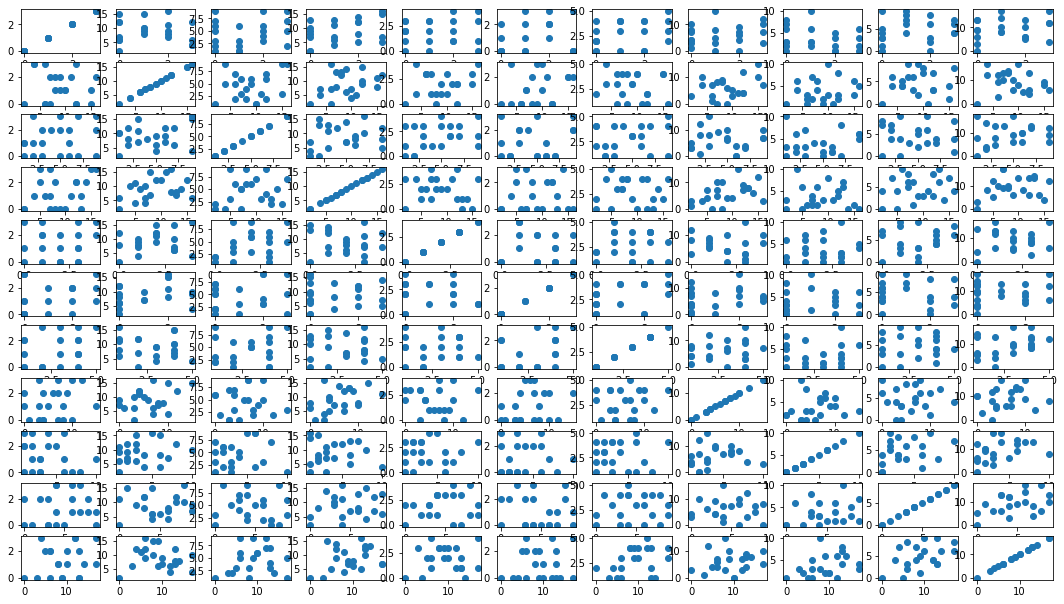

In [47]:
a = len(list_of_datasets)
fig, axs = plt.subplots(a,a)

for i in range(a):
    for j in range(a):
        axs[i, j].scatter(quakes_per_year.iloc[:, i+1],quakes_per_year.iloc[:, j+1])
        
fig.set_size_inches(18.5, 10.5)

In [48]:
quakes_per_year


,YEAR,10.0,30.0,40.0,60.0,100.0,120.0,130.0,140.0,150.0,160.0,170.0
0,2000,2,11,3,5,2,2,1,4,1,0,5
1,2001,0,6,2,2,3,0,1,1,3,4,3
2,2002,3,4,9,5,1,3,5,7,6,4,12
3,2003,0,15,9,8,2,2,4,10,6,1,9
4,2004,1,15,3,11,3,2,4,15,3,4,8
5,2005,3,12,2,15,0,0,2,12,2,7,4
6,2006,2,9,5,14,1,3,3,6,1,2,6
7,2007,0,7,3,13,1,1,2,8,7,9,13
8,2008,2,16,9,12,4,2,1,7,5,8,6
9,2009,3,6,7,16,3,0,4,3,1,4,12


In [49]:


def count_quakes_in_interval(center_date, #date
                             window_radius, #integer
                             dates_col): #column of dates
    
    count = 0
    
    for i in range(len(dates_col)):
        if dates_col[i] >= center_date - datetime.timedelta(days = window_radius):
            if dates_col[i] <= center_date + datetime.timedelta(days = window_radius):
                
                count += 1
                
    return(count)


count_quakes_in_interval(list_of_datasets[0]["DATE"][10], 600, list_of_datasets[0]["DATE"])

5

In [50]:
list_of_datasets[0]["DATE"][0]-datetime.timedelta(days = 5)

Timestamp('2000-02-02 00:00:00')

In [51]:
datetime.date(2000, 1, 1)-datetime.timedelta(days = 5)

datetime.date(1999, 12, 27)

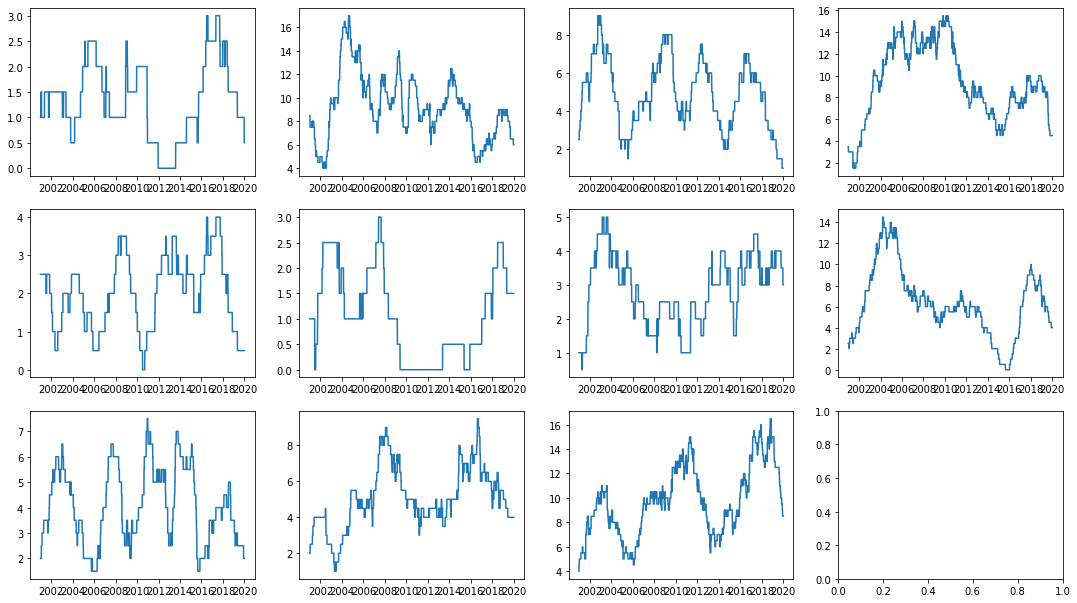

In [52]:
center_date = datetime.date(2000, 1, 1)

step = datetime.timedelta(days = 1)

window_radius = 365

localizedRates = pd.DataFrame()

dates = []


for i in range(len(list_of_datasets)):
    center_date = datetime.date(2000, 1, 1) + datetime.timedelta(days = window_radius)
    rates = [] #rates are earthquakes per year
    
    while center_date < datetime.date(2021, 1, 1)-datetime.timedelta(days = window_radius):
        
        dates += [center_date]

        rates += [365 * count_quakes_in_interval(center_date,
                                           window_radius,
                                           list_of_datasets[i]["DATE"]) / (2*window_radius)]


        center_date = center_date + step
    
    if i == 0:
        localizedRates["DATES"] = dates
    
    region = str(list_of_datasets[i]["REGION_CODE"][0])
    
    localizedRates[region] = rates
    
fig, axs = plt.subplots(3,4)

for i in range(len(list_of_datasets)):
    axs[i//4, i%4].plot(localizedRates["DATES"], localizedRates.iloc[:,i+1])
    
fig.set_size_inches(18.5, 10.5)


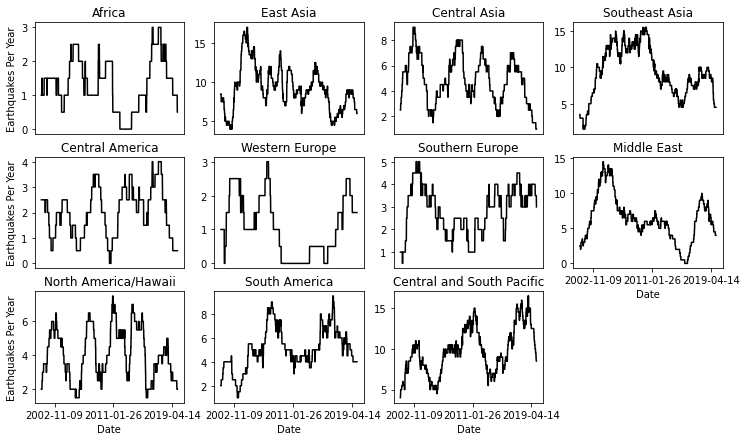

In [283]:
fig, axs = plt.subplots(3,4)

for i in range(len(list_of_datasets)):
    axs[i//4, i%4].plot(localizedRates["DATES"], localizedRates.iloc[:,i+1], color = "black")
    if i%4 == 0:
        axs[i//4, i%4].set_ylabel('Earthquakes Per Year')
    
    if i >= 7:
        axs[i//4, i%4].set_xlabel('Date')
        axs[i//4, i%4].xaxis.set_major_locator(plt.MaxNLocator(3))
    else:
        axs[i//4, i%4].axes.get_xaxis().set_visible(False)
    
    axs[i//4, i%4].set_title(list_of_datasets[i]["REGION_NAME"][0])
    
    if i == 0:
        axs[i//4, i%4].set_title("Africa")
    if i == 3:
        axs[i//4, i%4].set_title("Southeast Asia")
    if i == 5:
        axs[i//4, i%4].set_title("Western Europe")
    if i == 2:
        axs[i//4, i%4].set_title("Central Asia")
    if i == 8:
        axs[i//4, i%4].set_title("North America/Hawaii")
    
    
fig.set_size_inches(18.5/1.5, 10.5/1.5)
fig.delaxes(axs[2][3])

plt.savefig('localizedRates.pdf', bbox_inches='tight')

In [53]:
localizedRates.corr()

,10.0,30.0,40.0,60.0,100.0,120.0,130.0,140.0,150.0,160.0,170.0
10.0,1.000000,-0.162736,-0.059205,0.233770,-0.086184,0.259793,0.198461,0.182924,-0.417743,0.270128,0.192218
30.0,-0.162736,1.000000,-0.246766,0.491984,-0.127057,-0.050991,0.025245,0.509589,-0.045471,-0.132418,-0.374072
40.0,-0.059205,-0.246766,1.000000,0.002774,0.417732,0.024515,0.028652,-0.028313,0.134602,0.006720,0.118717
60.0,0.233770,0.491984,0.002774,1.000000,-0.163042,0.021904,-0.185845,0.496320,-0.140698,0.220200,0.125177
100.0,-0.086184,-0.127057,0.417732,-0.163042,1.000000,-0.207657,0.075001,-0.155457,0.048591,0.342633,0.034779
120.0,0.259793,-0.050991,0.024515,0.021904,-0.207657,1.000000,0.369326,0.421376,0.085801,-0.127273,0.028151
130.0,0.198461,0.025245,0.028652,-0.185845,0.075001,0.369326,1.000000,0.304343,-0.152073,-0.247692,0.060603
140.0,0.182924,0.509589,-0.028313,0.496320,-0.155457,0.421376,0.304343,1.000000,-0.098703,-0.364483,-0.036391
150.0,-0.417743,-0.045471,0.134602,-0.140698,0.048591,0.085801,-0.152073,-0.098703,1.000000,-0.081905,0.208598
160.0,0.270128,-0.132418,0.006720,0.220200,0.342633,-0.127273,-0.247692,-0.364483,-0.081905,1.000000,0.197717


We now have localized earthquake frequencies. We may use the correlation coefficients later on, but for now we are interested in being able to create short term earthquake forecasts, as opposed to being able to say "these regions are connected"

We now compute the waiting time against the localized expected waiting time to see if there are any significant differences

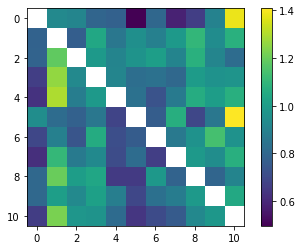

In [285]:
for i in range(len(list_of_datasets)):
    for j in range(len(list_of_datasets)):
        current_region = list_of_datasets[i]
        waiting_times = []
        expected_waiting_times = []


        for k in range(len(current_region["DATE"])):
            #print(i, j, k, current_region["DATE"])
            starting_date = current_region["DATE"][k]
            
            if min(localizedRates["DATES"]) <= starting_date and max(localizedRates["DATES"]) >= starting_date:
                region = list_of_datasets[j]
                next_quake = find_next_quake(starting_date, region)
                if next_quake is not None:

                    waiting_times += [next_quake]
                    
                    rate = float(localizedRates[localizedRates["DATES"] == starting_date].iloc[:,j+1])
                    
                    if rate == 0:
                        rate += 0.0001

                    expected_waiting_times += [(365)/rate] #waiting time in days
        
        #print("waiting times", waiting_times)
        #print("exp waiting times", expected_waiting_times)
        #raise
        
        stat = []
        
        for k in range(len(waiting_times)):
            if waiting_times[k] == 0:
                waiting_times[k] += 0.0001
            stat += [(waiting_times[k] / expected_waiting_times[k])]
            
        mean_stat = sum(stat)/len(stat)
        
        rate_matrix[i][j] = mean_stat
        
for i in range(len(list_of_datasets)):
    rate_matrix[i][i] = math.nan
    

        
plt.imshow(rate_matrix, interpolation='nearest')
plt.colorbar() #51s runtime

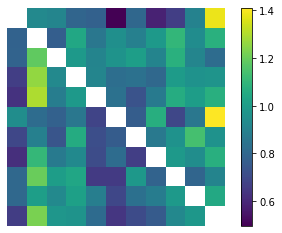

In [293]:
#fig, ax = plt.subplots(1,1)
plt.imshow(rate_matrix, interpolation='nearest')
plt.colorbar() 
plt.axis("off")
#plt.axes().get_xaxis().set_ticks([])
#ax.axes.get_xaxis().set_visible(False)
#ax.axes.get_yaxis().set_visible(False)
plt.savefig('indicatorRatios.pdf', bbox_inches='tight')

now we take the largest and smallest values from the matrix and attempt to create bootstrap distributions to see if they are significantly unusual.

In [83]:
#first we find maxes
m = np.copy(rate_matrix)
maxims = []

for i in range(len(list_of_datasets)):
    m[i][i] = math.inf*-1

for i in range(5):
    argmax = m.argmax()
    maxims += [[argmax//len(rate_matrix),argmax%len(rate_matrix)]]
    m[argmax//len(rate_matrix),argmax%len(rate_matrix)] = math.inf*-1
    
mins = []
m = np.copy(rate_matrix)

for i in range(len(list_of_datasets)):
    m[i][i] = math.inf

for i in range(5):
    argmin = m.argmin()
    mins += [[argmin//len(rate_matrix),argmin%len(rate_matrix)]]
    m[argmin//len(rate_matrix),argmin%len(rate_matrix)] = math.inf
    
print(maxims,mins)

[[5, 10], [0, 10], [4, 1], [3, 1], [10, 1]] [[0, 5], [0, 7], [7, 0], [4, 0], [10, 5]]


In [139]:
bootstrap_size = 1000

np.random.seed(6789)

mins_bootstrap_samps = []

for i in range(len(mins)):
    print(i)
    j = mins[i][1]
    bootstrap_sample = []

    for jj in range(bootstrap_size):
        
        waiting_times = []
        expected_waiting_times = []
        
        for k in range(len(list_of_datasets[mins[i][0]]["DATE"])):
            #print(i, j, k, current_region["DATE"])
            starting_date = pd.to_datetime(localizedRates["DATES"].sample(1).apply(str).item())

            if min(localizedRates["DATES"]) <= starting_date and max(localizedRates["DATES"]) >= starting_date:
                region = list_of_datasets[j]
                next_quake = find_next_quake(starting_date, region)
                if next_quake is not None:

                    waiting_times += [next_quake]

                    rate = float(localizedRates[localizedRates["DATES"] == starting_date].iloc[:,j+1])

                    if rate == 0:
                        rate += 0.0001

                    expected_waiting_times += [(365)/rate] #waiting time in days

        #print("waiting times", waiting_times)
        #print("exp waiting times", expected_waiting_times)
        #raise

        stat = []

        for k in range(len(waiting_times)):
            if waiting_times[k] == 0:
                waiting_times[k] += 0.0001
            stat += [(waiting_times[k] / expected_waiting_times[k])]

        mean_stat = sum(stat)/len(stat)
        
        bootstrap_sample += [mean_stat]
        
    mins_bootstrap_samps += [bootstrap_sample]
    
    
    

maxs_bootstrap_samps = []

for i in range(len(maxims)):
    print(i)
    j = maxims[i][1]
    bootstrap_sample = []

    for jj in range(bootstrap_size):
        
        waiting_times = []
        expected_waiting_times = []
        
        for k in range(len(list_of_datasets[maxims[i][0]]["DATE"])):
            #print(i, j, k, current_region["DATE"])
            starting_date = pd.to_datetime(localizedRates["DATES"].sample(1).apply(str).item())

            if min(localizedRates["DATES"]) <= starting_date and max(localizedRates["DATES"]) >= starting_date:
                region = list_of_datasets[j]
                next_quake = find_next_quake(starting_date, region)
                if next_quake is not None:

                    waiting_times += [next_quake]

                    rate = float(localizedRates[localizedRates["DATES"] == starting_date].iloc[:,j+1])

                    if rate == 0:
                        rate += 0.0001

                    expected_waiting_times += [(365)/rate] #waiting time in days

        #print("waiting times", waiting_times)
        #print("exp waiting times", expected_waiting_times)
        #raise

        stat = []

        for k in range(len(waiting_times)):
            if waiting_times[k] == 0:
                waiting_times[k] += 0.0001
            stat += [(waiting_times[k] / expected_waiting_times[k])]

        mean_stat = sum(stat)/len(stat)
        
        bootstrap_sample += [mean_stat]
        
    maxs_bootstrap_samps += [bootstrap_sample]

0
1
2
3
4
0
1
2
3
4


In [140]:
def get_mins_p_val(value, bootstrap_samp):
    count = 0
    for i in range(len(bootstrap_samp)):
        if bootstrap_samp[i] <= value:
            count += 1
            
    p_value = count/len(bootstrap_samp) #proportion where bootstrap is more extreme than observation
    
    return(p_value)

def get_maxs_p_val(value, bootstrap_samp):
    count = 0
    for i in range(len(bootstrap_samp)):
        if bootstrap_samp[i] >= value:
            count += 1
            
    p_value = count/len(bootstrap_samp) #proportion where bootstrap is more extreme than observation
    
    return(p_value)

In [138]:
maxs_bootstrap_samps100 = maxs_bootstrap_samps
mins_bootstrap_samps100 = mins_bootstrap_samps

In [141]:
maxs_bootstrap_samps1000 = maxs_bootstrap_samps
mins_bootstrap_samps1000 = mins_bootstrap_samps

In [143]:
mins_p_values = []
maxs_p_values = []

for i in range(len(mins)):
    mins_p_values += [get_mins_p_val(rate_matrix[mins[i][0]][mins[i][1]], mins_bootstrap_samps1000[i])]
    
for i in range(len(maxims)):
    maxs_p_values += [get_maxs_p_val(rate_matrix[maxims[i][0]][maxims[i][1]], maxs_bootstrap_samps1000[i])]
    
print("mins", mins_p_values)
print("maxs", maxs_p_values)

mins [0.087, 0.018, 0.046, 0.171, 0.047]
maxs [0.019, 0.015, 0.094, 0.021, 0.039]


In [144]:
mins[1]

[0, 7]

In [148]:
print('mins')
print("country A predicts sooner quake for country B")
for i in range(len(mins_p_values)):
    if mins_p_values[i] < 0.05:
        print(list_of_datasets[mins[i][0]]["COUNTRY"][0], list_of_datasets[mins[i][1]]["COUNTRY"][0])
        
print('maxs')
print("country A predicts later quake for country B")
for i in range(len(maxs_p_values)):
    if maxs_p_values[i] < 0.05:
        print(list_of_datasets[maxims[i][0]]["COUNTRY"][0], list_of_datasets[maxims[i][1]]["COUNTRY"][0])

mins
country A predicts sooner quake for country B
SOUTH AFRICA IRAN
IRAN SOUTH AFRICA
INDONESIA ICELAND
maxs
country A predicts later quake for country B
ICELAND INDONESIA
SOUTH AFRICA INDONESIA
INDIA CHINA
INDONESIA CHINA


Looks like we have detected a relationship between region 0 and 7 where earthquakes happen together. Let's look at the distribution of waiting times

In [161]:
waitingTimes_0_to_7 = []
waitingTimes_7_to_7 = []
waitingTimes_sim_to_7 = []



region = list_of_datasets[7]

for k in range(len(list_of_datasets[7]["DATE"])):
    starting_date = list_of_datasets[7]["DATE"][k] + datetime.timedelta(days=1)

    next_quake = find_next_quake(starting_date, region)

    if next_quake is not None:

        waitingTimes_7_to_7 += [next_quake]


for k in range(len(list_of_datasets[0]["DATE"])):
    starting_date = list_of_datasets[0]["DATE"][k]

    next_quake = find_next_quake(starting_date, region)

    if next_quake is not None:

        waitingTimes_0_to_7 += [next_quake]


for k in range(1000):
    #print(i, j, k, current_region["DATE"])
    starting_date = pd.to_datetime(localizedRates["DATES"].sample(1).apply(str).item())
    
    next_quake = find_next_quake(starting_date, region)

    if next_quake is not None:
        waitingTimes_sim_to_7 += [next_quake]


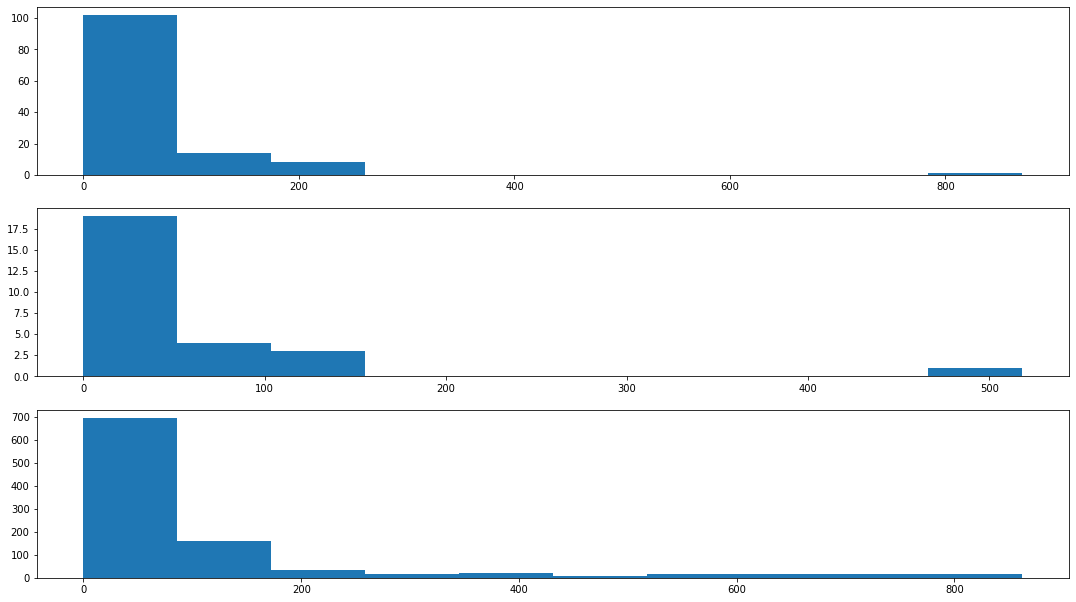

In [162]:
fig, axs = plt.subplots(3)

axs[0].hist(waitingTimes_7_to_7)
axs[1].hist(waitingTimes_0_to_7)
axs[2].hist(waitingTimes_sim_to_7)
    
fig.set_size_inches(18.5, 10.5)

In [158]:
datetime.timedelta(days=1)

datetime.timedelta(days=1)

In [167]:
print(sum(waitingTimes_0_to_7)/len(waitingTimes_0_to_7),
      sum(waitingTimes_7_to_7)/len(waitingTimes_7_to_7),
      sum(waitingTimes_sim_to_7)/len(waitingTimes_sim_to_7))

55.96296296296296 61.16 108.615


In [169]:
timeSpan = 7
count1 = 0
count2 = 0
count3 = 0

for i in range(len(waitingTimes_0_to_7)):
    if waitingTimes_0_to_7[i] <= timeSpan:
        count1 += 1
        
count1 = count1 / len(waitingTimes_0_to_7)

for i in range(len(waitingTimes_7_to_7)):
    if waitingTimes_7_to_7[i] <= timeSpan:
        count2 += 1
        
count2 = count2 / len(waitingTimes_7_to_7)

for i in range(len(waitingTimes_sim_to_7)):
    if waitingTimes_sim_to_7[i] <= timeSpan:
        count3 += 1
        
count3 = count3 / len(waitingTimes_sim_to_7)

print(count1, count2, count3)

0.2222222222222222 0.144 0.118


In [170]:
new_quakes.query("EQ_PRIMARY>7.5")

,level_0,index,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,...,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION,VALID_REGION,DATE,WAITING_TIME
5,4963,5018,5556,No,2000,3.0,28.0,11.0,0.0,22.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2000-03-28,50
7,4965,5020,5557,Yes,2000,5.0,4.0,4.0,21.0,16.2,...,3.0,30.0,4.0,10000.0,4.0,NaN,NaN,True,2000-05-04,29
10,4968,5023,5560,No,2000,6.0,4.0,16.0,28.0,26.1,...,4.0,6.0,3.0,NaN,NaN,NaN,NaN,True,2000-06-04,18
16,4974,5029,5565,Yes,2000,6.0,18.0,14.0,44.0,13.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2000-06-18,1
30,4989,5044,5581,Yes,2000,11.0,16.0,4.0,54.0,55.9,...,NaN,NaN,2.0,NaN,3.0,NaN,NaN,True,2000-11-16,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,6005,6060,10300,Yes,2018,1.0,23.0,9.0,31.0,42,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,True,2018-01-23,0
1025,6038,6093,10356,Yes,2018,8.0,19.0,0.0,19.0,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2018-08-19,7
1031,6045,6100,10361,No,2018,9.0,6.0,15.0,49.0,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2018-09-06,1
1067,6082,6137,10408,Yes,2019,5.0,14.0,12.0,58.0,25,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,True,2019-05-14,8


In [294]:
mins


[[0, 5], [0, 7], [7, 0], [4, 0], [10, 5]]

In [295]:
string = ''
for i in range(5):
    string += list_of_datasets[mins[i][0]]["REGION_NAME"][0] +" & "
    string += list_of_datasets[mins[i][1]]["REGION_NAME"][0] +" & "
    string += str(mins_p_values[i]) +" \\ "
    
string

'Central, Western and S. Africa & Northern and Western Europe & 0.087 \\ Central, Western and S. Africa & Middle East & 0.018 \\ Middle East & Central, Western and S. Africa & 0.046 \\ Central America & Central, Western and S. Africa & 0.171 \\ Central and South Pacific & Northern and Western Europe & 0.047 \\ '

In [297]:
for i in range(5):
    print(rate_matrix[mins[i][0]][mins[i][1]])

0.49623651506849326
0.5832329589041096
0.6188015652173914
0.6282085436193222
0.6420111508397183


In [298]:
len(new_quakes["DATE"])

1119